In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import sys

sys.path.append('../')
import utils

In [2]:
# Load the dataset
df = pd.read_csv('../data/illinois_basing_train.csv')
# Rename target column
df = df.rename(columns={'inj_diff\xa0': 'Target', 'SampleTimeUTC': 'Date'})

# Change Target outliers to regular points
df.at[836, 'Target'] = 15
df.at[837, 'Target'] = 30
df.at[838, 'Target'] = -44.5
df.at[839, 'Target'] = -0.5

# Fill empty 'hourly dates'
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.set_index('Date').sort_index()
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(date_range, fill_value=0)
df = df.dropna(subset='Target')
df.reset_index(inplace=True, drop=False)
df = df.rename(columns={'index': 'Date'})
# df['Original Target'] = df['Target']
# df['Target'] = np.abs(df['Target'])
# df['Target'] = df['Target'].clip(upper=45.7)

In [11]:
nan_indices = np.where(df['Avg_CCS1_WHCO2InjPs_psi'].isna())[0]

nan_seq = []
temp_seq = []
for i, idx in enumerate(nan_indices):
    if i == 0:
        temp_seq.append(idx)
    elif idx == nan_indices[i-1]+1:
        temp_seq.append(idx)
    else:
        nan_seq.append(temp_seq)
        temp_seq = [idx]
# add the last sequence
if temp_seq:
    nan_seq.append(temp_seq)

In [77]:
df.loc[nan_seq[0], 'Avg_CCS1_WHCO2InjPs_psi'] = 0.203125
df.loc[nan_seq[1], 'Avg_CCS1_WHCO2InjPs_psi'] = 0.203125
df.loc[nan_seq[2], 'Avg_CCS1_WHCO2InjPs_psi'] = 0.203125
df.loc[nan_seq[3], 'Avg_CCS1_WHCO2InjPs_psi'] = 0.203125
df.loc[nan_seq[4], 'Avg_CCS1_WHCO2InjPs_psi'] = 0.233507
df.loc[nan_seq[5], 'Avg_CCS1_WHCO2InjPs_psi'] = 1.03
df.loc[nan_seq[6], 'Avg_CCS1_WHCO2InjPs_psi'] = 0.2
df.loc[list(range(622,661)), 'Avg_CCS1_WHCO2InjPs_psi'] = 0.2
df.loc[nan_seq[9], 'Avg_CCS1_WHCO2InjPs_psi'] = 0.2
df.loc[nan_seq[10], 'Avg_CCS1_WHCO2InjPs_psi'] = 0.2
df.loc[nan_seq[11], 'Avg_CCS1_WHCO2InjPs_psi'] = 0.2

In [79]:
df['Avg_CCS1_WHCO2InjPs_psi'][df['Avg_CCS1_WHCO2InjPs_psi'].isna()].index

Int64Index([], dtype='int64')

In [56]:
df_first_1500 = df.iloc[:1500]

In [31]:
# calculate correlation coefficients with column X
corr_matrix = df_first_1500.corr()['Avg_CCS1_WHCO2InjPs_psi']

# find the 3 highest correlated columns
top_3_cols = corr_matrix.abs().sort_values(ascending=False)[1:4].index.tolist()

In [78]:
df['Avg_CCS1_WHCO2InjPs_psi'].isna().sum()

0

In [33]:
top_3_cols

['Avg_CCS1_ANPs_psi', 'Avg_VW1_ANPs_psi', 'Avg_CCS1_DH6325Ps_psi']

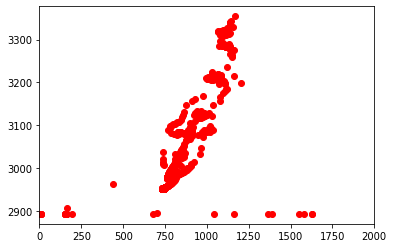

In [35]:
import matplotlib.pyplot as plt

plt.plot(df_first_1500['Avg_CCS1_WHCO2InjPs_psi'], df_first_1500[top_3_cols[2]], 'ro')
plt.xlim(0,2000)
plt.show()

<AxesSubplot:>

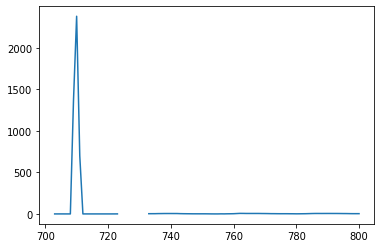

In [45]:
df[['Avg_CCS1_WHCO2InjPs_psi', 'Target']].loc[700:800]['Avg_CCS1_WHCO2InjPs_psi'].plot()

<AxesSubplot:>

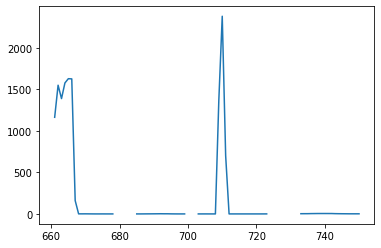

In [58]:
df['Avg_CCS1_WHCO2InjPs_psi'].loc[660:750].plot()

In [12]:
nan_seq

[[11],
 [13, 14],
 [33, 34, 35, 36, 37],
 [39],
 [60],
 [440,
  441,
  442,
  443,
  444,
  445,
  446,
  447,
  448,
  449,
  450,
  451,
  452,
  453,
  454,
  455,
  456,
  457,
  458,
  459,
  460,
  461,
  462,
  463,
  464,
  465,
  466,
  467,
  468,
  469,
  470,
  471,
  472,
  473,
  474,
  475,
  476,
  477,
  478,
  479,
  480,
  481,
  482,
  483,
  484,
  485,
  486,
  487,
  488,
  489,
  490,
  491,
  492,
  493,
  494],
 [581, 582, 583, 584, 585, 586, 587, 588, 589, 590],
 [622,
  623,
  624,
  625,
  626,
  627,
  628,
  629,
  630,
  631,
  632,
  633,
  634,
  635,
  636,
  637,
  638,
  639,
  640],
 [645,
  646,
  647,
  648,
  649,
  650,
  651,
  652,
  653,
  654,
  655,
  656,
  657,
  658,
  659,
  660],
 [679, 680, 681, 682, 683, 684],
 [700, 701, 702],
 [724, 725, 726, 727, 728, 729, 730, 731, 732]]

In [9]:
df[['Avg_CCS1_WHCO2InjPs_psi', 'Target']]

,Avg_CCS1_WHCO2InjPs_psi,Target
0,1.374349,0.000000
1,1.315104,0.000000
2,1.255859,0.000000
3,1.342448,0.000000
4,0.845703,0.000000
...,...,...
27458,1409.701282,-0.031250
27459,1409.036129,-0.091320
27460,1408.648841,-0.137501
27461,1406.788722,0.037290


In [4]:
x = ['Avg_CCS1_WHCO2InjPs_psi',
       'Avg_CCS1_DH6325Ps_psi', 'Avg_CCS1_WHCO2InjPs',
       'Temperature diff 6720-5653 ft',
       'Pressure diff 6982-6720 ft2', 'Avg_CCS1_WHCO2InjTp_F',
       'Avg_CCS1_WHCO2InjPs_psi', 'Avg_CCS1_WHCO2InjPs_psi',
       'Avg_CCS1_WHCO2InjPs_psi', 'Avg_PLT_CO2VentRate_TPH',
       'Pressure diff 6837-6632 ft',
       'Temperature diff 5001-4917 ft', 'Avg_CCS1_DH6325Ps_psi',
       'Avg_CCS1_WHCO2InjPs_psi',
       'Avg_PLT_CO2VentRate_TPH', 'Avg_CCS1_WHCO2InjPs_psi']

In [5]:
list(set(x))

['Pressure diff 6837-6632 ft',
 'Avg_CCS1_WHCO2InjPs',
 'Temperature diff 5001-4917 ft',
 'Avg_PLT_CO2VentRate_TPH',
 'Avg_CCS1_WHCO2InjPs_psi',
 'Avg_CCS1_DH6325Ps_psi',
 'Temperature diff 6720-5653 ft',
 'Avg_CCS1_WHCO2InjTp_F',
 'Pressure diff 6982-6720 ft2']

In [8]:
df.isna().sum()[(df.isna().sum()>0)&(df.columns.isin(list(set(x))))]

Avg_CCS1_WHCO2InjPs_psi    128
dtype: int64

In [192]:
# date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
# missing_hours = date_range.difference(df.index)
# if not missing_hours.empty:
#     print("Missing hours found:")
#     print(missing_hours)
# else:
#     print("No missing hours found.")

In [17]:
# Create windows of fluctuations
windows = utils.create_fluctuation_windows(df, threshold=2, target_column_name='Target', date_column_name='Date')

df = df.set_index('Date').sort_index()

In [19]:
trace_all = go.Scatter(
    x=df.index,
    y=df['Target'],
    mode='lines',
    name='All data',
    line=dict(color='black')
)
window_traces = []
for i, (window_indices, window_values) in enumerate(windows):
    window_df = pd.DataFrame(window_values, columns=['Target'], index=window_indices)
    trace = go.Scatter(
        x=window_df.index,
        y=window_df['Target'],
        mode='lines',
        name=f'Window {i+1}',
        line=dict(color='red')
    )
    window_traces.append(trace)


data = [trace_all] + window_traces
layout = go.Layout(
    title='Target Column with Windows',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Target Column'),
)

# df['window_start'] = 0
# for window_indices, _ in windows:
#     df.loc[window_indices[0], 'window_start'] = 1

# shapes = []
# for window_indices, _ in windows:
#     shape = dict(
#         type='line',
#         xref='x',
#         x0=window_indices[0],
#         x1=window_indices[0],
#         yref='paper',
#         y0=0,
#         y1=1,
#         line=dict(color='green', width=1, dash='dot')
#     )
#     shapes.append(shape)

# data = [trace_all] + window_traces
# layout = go.Layout(
#     title='Target Column with Windows',
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Target Column'),
#     shapes=shapes
# )
fig = go.Figure(data=data, layout=layout)
fig.show()

In [15]:
[x[1] for x in windows]

[[4000.0, 7033.459028, -11021.13264, -12.32638873],
 [5.055208357,
  0.164236005,
  22.18923628,
  14.03923602,
  0.177431234,
  0.115277481,
  -4.320139218,
  -37.42048616,
  0.0,
  0.0,
  0.000694442,
  -0.000694442,
  9.08923622,
  21.51631946,
  5.009375302,
  6.232638804,
  0.304165904,
  -0.228125,
  0.602083588,
  -0.051388677,
  -6.599652656,
  6.19027791],
 [-25.60515028, -2.76388882],
 [-3.155555344, -11.83819426, 0.0, 0.0, 0.06875, 8.459027672, 5.856944736],
 [-4.239583651, 10.9475691],
 [-17.77743069,
  -3.349305479,
  0.457291667,
  9.159722273,
  5.053472225,
  -5.374305471,
  5.61698484,
  -12.59649884,
  20.59826414,
  10.38611058],
 [6.44965388, 2.533679708],
 [-22.97743123, -19.46388861],
 [7.316666889,
  8.828819354,
  -16.14548624,
  14.17430564,
  6.914930606,
  1.180555026,
  -0.209722169,
  0.097569656,
  -16.95902759,
  -5.198611164,
  2.942361244,
  19.29062484,
  0.048263677,
  0.239583492,
  -0.081944656,
  -0.473958254,
  -0.493055503,
  -3.938541269,
  -17.

In [16]:
windows

[([Timestamp('2009-11-04 20:00:00'),
   Timestamp('2009-11-04 21:00:00'),
   Timestamp('2009-11-04 22:00:00'),
   Timestamp('2009-11-04 23:00:00')],
  [4000.0, 7033.459028, -11021.13264, -12.32638873]),
 ([Timestamp('2009-11-15 16:00:00'),
   Timestamp('2009-11-15 17:00:00'),
   Timestamp('2009-11-15 18:00:00'),
   Timestamp('2009-11-15 19:00:00'),
   Timestamp('2009-11-15 20:00:00'),
   Timestamp('2009-11-15 21:00:00'),
   Timestamp('2009-11-15 22:00:00'),
   Timestamp('2009-11-15 23:00:00'),
   Timestamp('2009-11-16 00:00:00'),
   Timestamp('2009-11-16 01:00:00'),
   Timestamp('2009-11-16 02:00:00'),
   Timestamp('2009-11-16 03:00:00'),
   Timestamp('2009-11-16 04:00:00'),
   Timestamp('2009-11-16 05:00:00'),
   Timestamp('2009-11-16 06:00:00'),
   Timestamp('2009-11-16 07:00:00'),
   Timestamp('2009-11-16 08:00:00'),
   Timestamp('2009-11-16 09:00:00'),
   Timestamp('2009-11-16 10:00:00'),
   Timestamp('2009-11-16 11:00:00'),
   Timestamp('2009-11-16 12:00:00'),
   Timestamp('2009-1

<AxesSubplot:xlabel='Date'>

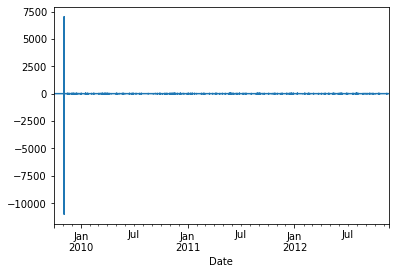

In [17]:
df['Target'].plot()

In [17]:
len(windows)

326

(array([224.,  55.,  21.,  11.,  10.,   3.,   1.,   0.,   0.,   1.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <BarContainer object of 10 artists>)

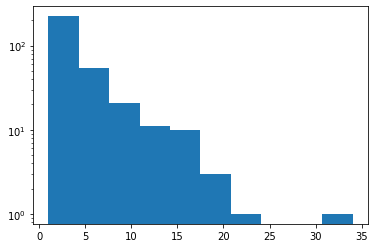

In [18]:
plt.hist([len(x[1]) for x in windows], log=True)

(0.0, 200.0)

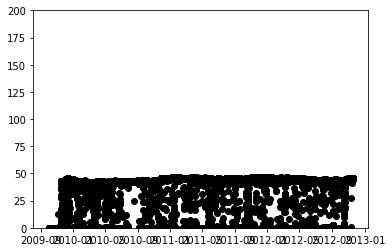

In [19]:
plt.plot(df['Avg_PLT_CO2InjRate_TPH'], 'ko')
plt.ylim(0,200)

In [20]:
df.reset_index(inplace=True, drop=False)
df = df.rename(columns={'index': 'Date'})

In [21]:
window_vals = [x[1] for x in windows]

In [22]:
window_vals

[[4000.0, 7033.459028, 11021.13264, 12.32638873],
 [5.055208357,
  0.164236005,
  22.18923628,
  14.03923602,
  0.177431234,
  0.115277481,
  4.320139218,
  37.42048616,
  0.0,
  0.0,
  0.000694442,
  0.000694442,
  9.08923622,
  21.51631946,
  5.009375302,
  6.232638804,
  0.304165904,
  0.228125,
  0.602083588,
  0.051388677,
  6.599652656,
  6.19027791],
 [25.60515028, 2.76388882],
 [3.155555344, 11.83819426, 0.0, 0.0, 0.06875, 8.459027672, 5.856944736],
 [4.239583651, 10.9475691],
 [17.77743069,
  3.349305479,
  0.457291667,
  9.159722273,
  5.053472225,
  5.374305471,
  5.61698484,
  12.59649884,
  20.59826414,
  10.38611058],
 [6.44965388, 2.533679708],
 [22.97743123, 19.46388861],
 [7.316666889,
  8.828819354,
  16.14548624,
  14.17430564,
  6.914930606,
  1.180555026,
  0.209722169,
  0.097569656,
  16.95902759,
  5.198611164,
  2.942361244,
  19.29062484,
  0.048263677,
  0.239583492,
  0.081944656,
  0.473958254,
  0.493055503,
  3.938541269,
  17.53333357],
 [15.62534721,
  

In [23]:
def get_percentage_pos_neg(lst):
    results = []
    for sublist in lst:
        if len(sublist) > 1:
            positive_count = 0
            negative_count = 0
            for num in sublist:
                if num >= 0:
                    positive_count += 1
                else:
                    negative_count += 1
            total_count = positive_count + negative_count
            if total_count > 0:
                positive_percent = (positive_count / total_count) * 100
                negative_percent = (negative_count / total_count) * 100
                results.append(positive_percent)
    return results

Text(0.5, 0, 'Pct of positives to negatives within window')

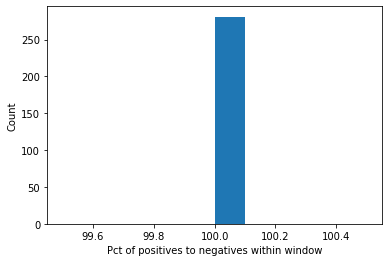

In [24]:
plt.hist(get_percentage_pos_neg(window_vals))
plt.ylabel('Count')
plt.xlabel('Pct of positives to negatives within window')

In [23]:
def get_percentage_positive_starts(lst):
    positive_count = 0
    negative_count = 0
    for sublist in lst:
        if len(sublist) > 0:
            if sublist[0] >= 0:
                positive_count += 1
            else:
                negative_count += 1
    total_count = positive_count + negative_count
    if total_count > 0:
        positive_percent = (positive_count / total_count) * 100
        negative_percent = (negative_count / total_count) * 100
        return positive_percent, negative_percent
    else:
        return None

In [24]:
get_percentage_positive_starts(window_vals)

(34.226190476190474, 65.77380952380952)